`import library`

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Import Data
`Data Transaksi Barber`

In [93]:
df_tf = pd.read_csv('Data_Transaksi_Barber.csv')
df_tf.head()

,Urutan,id_cust,Status,Cukur_ke,Capster,Hari,Tanggal,keterangan,Bayar,Haircut,...,Pomade 3,Pomade 4,Pomade 5,Pomade 6,Pomade 7,Pomade 8,Pomade 9,Conditioner,Hairtonic,Total Payment
0,1.0,26908171Haety,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
1,2.0,26924970Riand,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
2,3.0,25789556Buawa,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
3,4.0,26770753Litan,baru,1.0,irh,selasa,17/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
4,5.0,26770753Tatan,baru,1.0,irh,selasa,17/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000


`Data Google Business`

In [94]:
df_goo = pd.read_csv('data_googlebusiness.csv')
df_goo.head()

,Start Date,End Date,Overall rating,Total searches,Direct searches,Discovery searches,Total views,Search views,Maps views,Total actions,Website actions,Directions actions,Phone call actions
0,NaN,NaN,Overall rating of this listing as of the date ...,Number of times customers found this listing b...,Number of times customers found this listing b...,Number of times customers found this listing b...,Number of times this listing has been viewed o...,Number of times this listing has been viewed o...,Number of times this listing has been viewed o...,Number of times customers have taken action on...,Number of times customers have visited the web...,Number of times customers have requested direc...,Number of times customers have called the busi...
1,15/08/2021,28/08/2021,5,155,22,133,366,6,360,4,1,2,1
2,29/08/2021,11/09/2021,5,2216,715,1501,2676,339,2337,25,5,14,6
3,12/09/2021,25/09/2021,5,3222,461,2761,4037,303,3734,19,4,13,2
4,26/09/2021,09/10/2021,5,2886,404,2482,3538,220,3318,16,2,14,0


In [95]:
#baris pertama data adalah deskripsi kolom maka akan dihapus
df_goo = df_goo.loc[1:,:]

`Data Price List`

In [96]:
df_price = pd.read_csv('data_pricelist.csv')
df_price.head()

,Product/Service,Price
0,Haircut,35000
1,Haircolor,60000-175000
2,Creambath,70000
3,Shaving,10000
4,Vitamin,90000


##Cek Nilai Hilang
`fungsi cek nilai hilang`

In [97]:
def checkmissingvalue(data):
  mis = (data.isna().sum()*100/len(data)).sort_values(ascending=False)
  x = pd.DataFrame(mis)
  x = x.T
  diatas50 = []
  dibawah50 = []
  for i in x.columns:
    if x[i].values > 50:
      diatas50.append(i)
    else:
      dibawah50.append(i)
  print('urutan missing value dari terbesar =\n',mis)
  print('nilai hilang diatas 50 % = ',diatas50)
  print('nilai hilang dibawah 50 % = ',dibawah50)
  print('bentuk data = ',data.shape)

`cek nilai hilang data transaksi`

In [98]:
checkmissingvalue(df_tf)

urutan missing value dari terbesar =
 Pomade 8         100.000000
Pomade 4         100.000000
Pomade 3          99.951196
Pomade 7          99.951196
Pomade 2          99.902391
keterangan        99.853587
Pomade 9          99.755979
Powder B          99.658370
Creambath         99.560761
Vitamin           99.511957
Pomade 1          99.511957
Conditioner       99.511957
Pomade 5          99.414348
Pomade 6          99.072718
Shaving           98.877501
Powder A          98.438263
Haircolor         98.194241
Hairtonic         92.972182
Cukur_ke           2.733041
Urutan             0.146413
id_cust            0.146413
Capster            0.146413
Status             0.146413
Haircut            0.000000
Bayar              0.000000
Tanggal            0.000000
Hari               0.000000
Total Payment      0.000000
dtype: float64
nilai hilang diatas 50 % =  ['Pomade 8', 'Pomade 4', 'Pomade 3', 'Pomade 7', 'Pomade 2', 'keterangan', 'Pomade 9', 'Powder B', 'Creambath', 'Vitamin', 'Pomade 1', 

`cek nilai hilang data google bisnis`

In [99]:
df_goo = df_goo.loc[1:,:]
checkmissingvalue(df_goo)

urutan missing value dari terbesar =
 Start Date            0.0
End Date              0.0
Overall rating        0.0
Total searches        0.0
Direct searches       0.0
Discovery searches    0.0
Total views           0.0
Search views          0.0
Maps views            0.0
Total actions         0.0
Website actions       0.0
Directions actions    0.0
Phone call actions    0.0
dtype: float64
nilai hilang diatas 50 % =  []
nilai hilang dibawah 50 % =  ['Start Date', 'End Date', 'Overall rating', 'Total searches', 'Direct searches', 'Discovery searches', 'Total views', 'Search views', 'Maps views', 'Total actions', 'Website actions', 'Directions actions', 'Phone call actions']
bentuk data =  (18, 13)


`cek nilai hilang data list harga`

In [100]:
checkmissingvalue(df_price)

urutan missing value dari terbesar =
 Product/Service    0.0
Price              0.0
dtype: float64
nilai hilang diatas 50 % =  []
nilai hilang dibawah 50 % =  ['Product/Service', 'Price']
bentuk data =  (18, 2)


#Mengatasi Nilai Hilang
`hapus kolom yang memuat missing value > 50%`

In [101]:
#variabel dengan missing value diatas 50% dianggap noise maka akan dihapus
col_delete = ['Pomade 8', 'Pomade 4', 'Pomade 3', 'Pomade 7', 'Pomade 2', 'keterangan', 'Pomade 9', 'Powder B', 'Creambath', 'Vitamin', 'Pomade 1', 'Conditioner', 'Pomade 5', 'Pomade 6', 'Shaving', 'Powder A', 'Haircolor', 'Hairtonic']
df_tf.drop(col_delete,axis=1,inplace=True)

#variabel Urutan tidak terlalu penting maka akan dihapus
df_tf.drop('Urutan',axis=1,inplace=True)
df_tf.head()

,id_cust,Status,Cukur_ke,Capster,Hari,Tanggal,Bayar,Haircut,Total Payment
0,26908171Haety,baru,1.0,irh,senin,16/08/2021,Cash,30000,30000
1,26924970Riand,baru,1.0,irh,senin,16/08/2021,Cash,30000,30000
2,25789556Buawa,baru,1.0,irh,senin,16/08/2021,Cash,30000,30000
3,26770753Litan,baru,1.0,irh,selasa,17/08/2021,Cash,30000,30000
4,26770753Tatan,baru,1.0,irh,selasa,17/08/2021,Cash,30000,30000


`impute missing value`

In [102]:
#membagi atribut numerik dan kategorik
num = df_tf.select_dtypes(exclude='object')
cat = df_tf.select_dtypes(include='object')

In [103]:
modetreat = cat.columns[cat.isna().any()].to_list()
mediantreat = num.columns[num.isna().any()].to_list()

for i in modetreat:
  cat.loc[cat.loc[:,i].isna(),i] = cat.loc[:,i].mode()[0] #var kategori diisi dengan modus

for i in mediantreat:
  num.loc[num.loc[:,i].isna(),i] = num.loc[:,i].median() #var numerik diisi dengan median

df_tf = pd.concat([num,cat],axis=1)
df_tf.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Cukur_ke         0
Haircut          0
Total Payment    0
id_cust          0
Status           0
Capster          0
Hari             0
Tanggal          0
Bayar            0
dtype: int64

NB: karena data duplikat mempengaruhi analisis maka tidak dihapus

#Analisis Eksplorasi Data

`konversi tipe data variabel tanggal`

In [104]:
df_tf['Tanggal'] = pd.to_datetime(df_tf['Tanggal'],format='%d/%m/%Y')
df_goo['Start Date'] = pd.to_datetime(df_goo['Start Date'],format='%d/%m/%Y')
df_goo['End Date'] = pd.to_datetime(df_goo['End Date'],format='%d/%m/%Y')

##Analisis Data Transaksi
`visualisasi variabel kategori`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

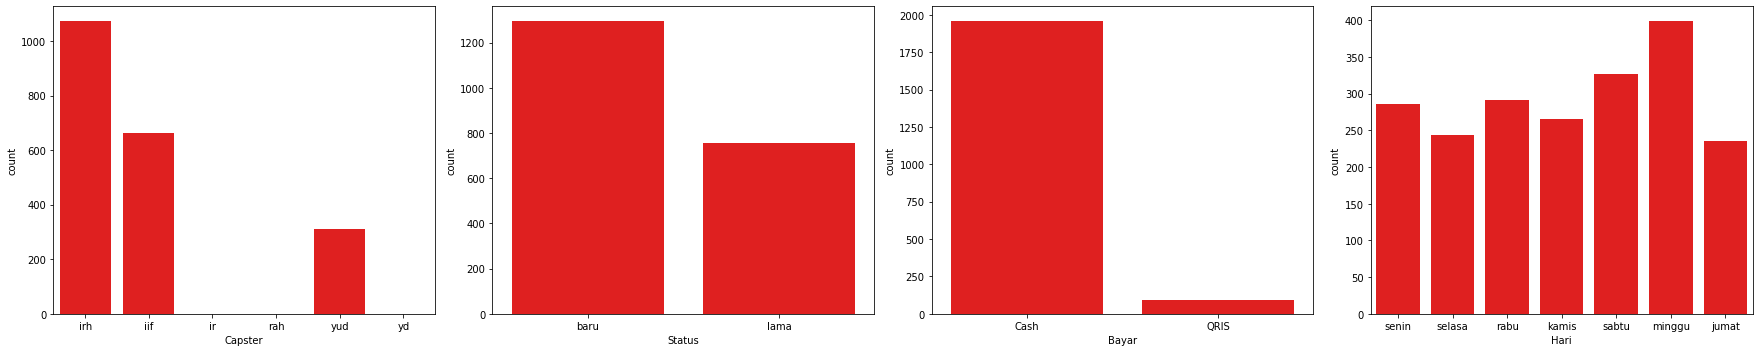

In [105]:
cat_plot = ['Capster','Status','Bayar','Hari']

plt.figure(figsize=(30,5))
for count,i in enumerate(cat_plot,1):
  plt.subplot(1,5,count+1)
  sns.countplot(df_tf[i],color='red')
  plt.tight_layout()

Insight ;
1. *terdapat capster terlihat kosong dalam data dan akan dilakukan cek*
2. terlihat pengujung baru lebih banyak dibandingkan pengujung lama
3. terlihat pembayaran cash lebih banyak dibandingkan Qris
4. Asumsi "Hari weekday atau weekend juga bisa jadi berpengaruh terhadap banyaknya kedatangan customer" diterima.



In [106]:
#cek variabel capster yang terlihat kosong dalam data
names = ['ir', 'rah', 'yd']
df_tf[df_tf.Capster.isin(names)]

,Cukur_ke,Haircut,Total Payment,id_cust,Status,Capster,Hari,Tanggal,Bayar
1089,2.0,35000,35000,25506597Rooma,lama,ir,rabu,2022-01-19,Cash
1181,2.0,35000,35000,25825025Rihru,lama,rah,jumat,2022-01-28,Cash
1602,3.0,35000,35000,2561701Yusuf,lama,yd,jumat,2022-03-04,Cash


NB : terlihat imbalance pada data Capster dan akan dihapus

In [107]:
df_tf = df_tf.drop([1089, 1181, 1602])

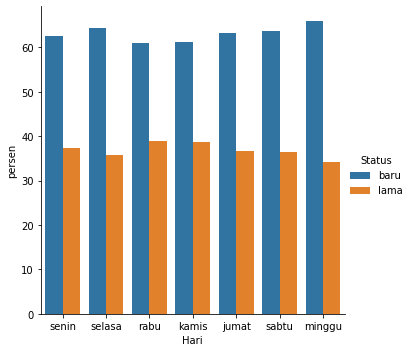

In [108]:
cat_type = pd.CategoricalDtype(
    categories=['senin', 'selasa', 'rabu', 'kamis', 'jumat', 'sabtu', 'minggu'],
    ordered=True)
df_tf['Hari'] = df_tf['Hari'].astype(cat_type)

df = df_tf.groupby('Hari')['Status'].value_counts(normalize=True).mul(100).rename('persen').reset_index()
sns.catplot(data=df,x='Hari',y='persen',hue='Status',kind='bar')

Insight ;
*   Pengunjung baru relatif meningkat mendekati hari weekend
*   Pengunjung lama relatif menurun mendekati hari weekend

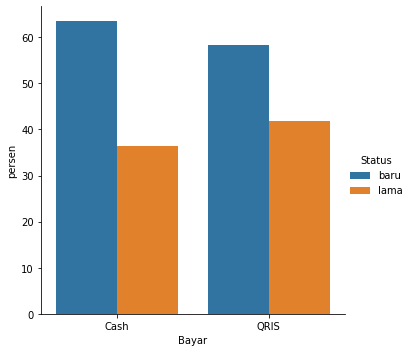

In [109]:
df = df_tf.groupby('Bayar')['Status'].value_counts(normalize=True).mul(100).rename('persen').reset_index()
sns.catplot(data=df,x='Bayar',y='persen',hue='Status',kind='bar')

Insight ;
*   Pengunjung baru relatif melakukan pembayaran Cash
*   Pengunjung lama relatif melakukan pembayaran Qris


`visualisasi variabel numerik`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]), <a list of 8 Text major ticklabel objects>)

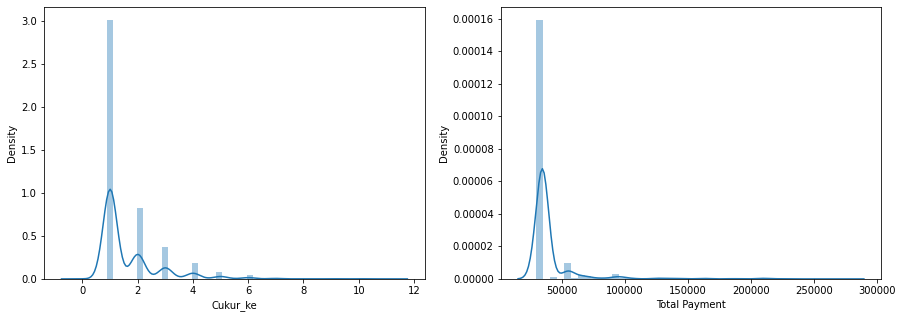

In [110]:
plt.figure(figsize=(15,5))

ax = plt.subplot(121)
sns.distplot(df_tf['Cukur_ke'],ax=ax)
plt.xticks(rotation='0')

ax = plt.subplot(122)
sns.distplot(df_tf['Total Payment'],ax=ax)
plt.xticks(rotation='0')

Insight ;
*   Pengunjung lama tidak bisa langsung disebut sebagai pelanggan tetap
*   Pengunjung baru dan lama relatif hanya melakukan `hair cut + pomade` dan tidak terlihat permintaan terhadap fasilitas lainnya

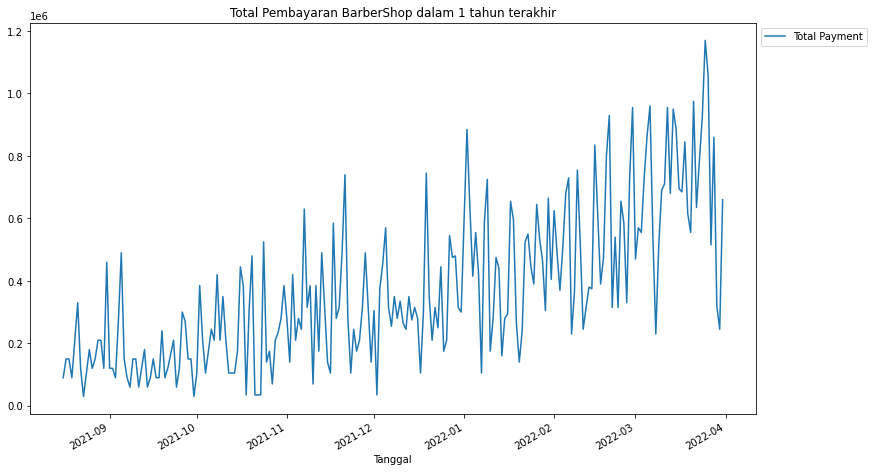

In [111]:
df = df_tf.groupby('Tanggal').sum()['Total Payment']
df.plot(kind='line', figsize=(13, 8))
plt.legend(loc='upper center',bbox_to_anchor=(1.08, 1))
plt.title('Total Pembayaran BarberShop dalam 1 tahun terakhir')
plt.ylabel('')
plt.xlabel('Tanggal')
plt.show() 

Insight ;
*   Income BarberShope relatif meningkat setiap bulannya dalam 1 tahun terakhir

##Analisis Data Google Bisnis

In [112]:
total_pelanggan = []
for i in range(df_goo.shape[0]):
  y = df_tf.loc[(df_tf['Tanggal'] >= df_goo['Start Date'].unique()[i]) & (df_tf['Tanggal'] <= df_goo['End Date'].unique()[i])].shape[0]
  total_pelanggan.append(y)

df_goo['total_pelanggan'] = total_pelanggan
df_goo

,Start Date,End Date,Overall rating,Total searches,Direct searches,Discovery searches,Total views,Search views,Maps views,Total actions,Website actions,Directions actions,Phone call actions,total_pelanggan
1,2021-08-15,2021-08-28,5,155,22,133,366,6,360,4,1,2,1,54
2,2021-08-29,2021-09-11,5,2216,715,1501,2676,339,2337,25,5,14,6,72
3,2021-09-12,2021-09-25,5,3222,461,2761,4037,303,3734,19,4,13,2,54
4,2021-09-26,2021-10-09,5,2886,404,2482,3538,220,3318,16,2,14,0,84
5,2021-10-10,2021-10-23,5,2738,364,2374,3911,242,3669,27,0,27,0,75
6,2021-10-24,2021-11-06,5,3444,791,2653,4763,335,4428,95,1,93,1,100
7,2021-11-07,2021-11-20,5,4932,765,4167,7119,456,6663,144,4,133,7,132
8,2021-11-21,2021-12-04,5,4708,987,3721,8778,433,8345,68,2,64,2,104
9,2021-12-05,2021-12-18,5,7092,1185,5907,11170,586,10584,154,7,143,4,112
10,2021-12-19,2022-01-01,5,5368,853,4515,8322,395,7927,63,5,55,3,115


**NB : baris terakhir data google bisnis tidak sesuai dengan data transaksi maka data akan dihapus**

In [113]:
df_goo = df_goo.drop([18])

`analisis regresi data google business`

In [114]:
from sklearn.feature_selection import f_regression

#REGRESI
X = df_goo.drop(['Start Date', 'End Date', 'Overall rating', 'total_pelanggan'],axis=1)
y = df_goo['total_pelanggan']

f_val, p_val = f_regression(X,y)
np.where(p_val>0.05)

(array([2, 4, 7, 9]),)

In [115]:
X.iloc[:,[2, 4, 7, 9]].columns

Index(['Discovery searches', 'Search views', 'Website actions',
       'Phone call actions'],
      dtype='object')

Kesimpulan : **Variabel** `Discovery searches, Search views, Website actions,Phone call actions` **tidak berpengaruh signifikan terhadap total pelanggan yang datang**

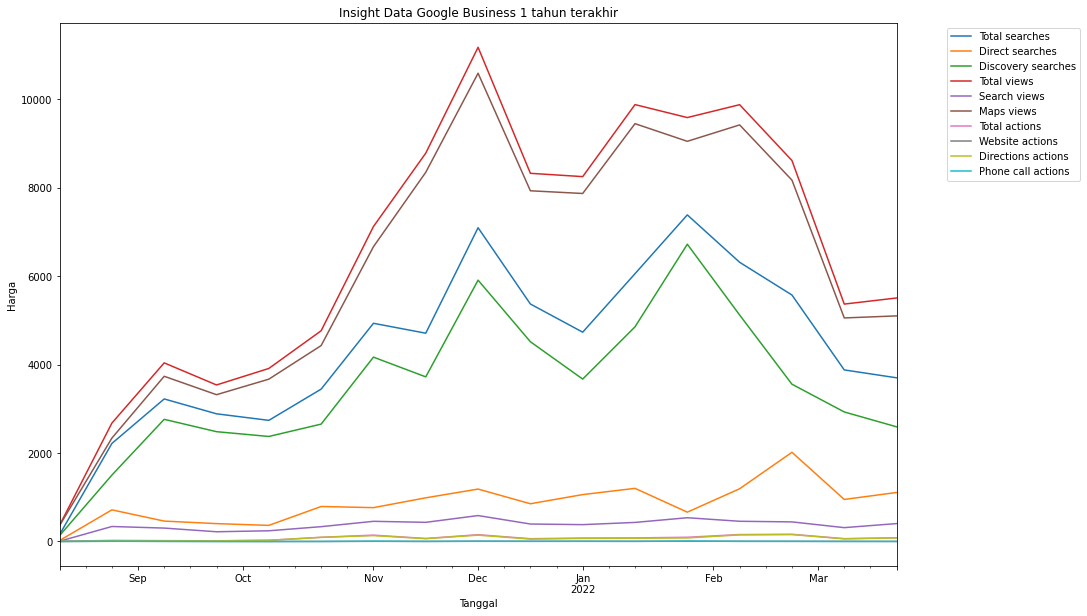

In [116]:
X.index = df_goo['Start Date']
col = X.columns

for i in col:
  X[i] = pd.to_numeric(X[i])

X.plot(kind='line', figsize=(15, 10))
plt.legend(loc='upper center',bbox_to_anchor=(1.14, 1))
plt.title('Insight Data Google Business 1 tahun terakhir')
plt.ylabel('Harga')
plt.xlabel('Tanggal')
plt.show() 

Insight ;
*   `Variabel Total searches, Discovery searches, Total views, Maps views` memiliki pola trend yang sama dalam 1 tahun terakhir 
*   `Variabel Direct searches, Search views, Total actions, Website actions, Directions actions, Phone call actions` memiliki pola trend yang sama dalam 1 tahun terakhir 

#Data Preprocessing

In [117]:
df_goo.columns

Index(['Start Date', 'End Date', 'Overall rating', 'Total searches',
       'Direct searches', 'Discovery searches', 'Total views', 'Search views',
       'Maps views', 'Total actions', 'Website actions', 'Directions actions',
       'Phone call actions', 'total_pelanggan'],
      dtype='object')

In [118]:
df = df_goo.drop(['End Date', 'Overall rating', 'Total searches',
       'Direct searches', 'Discovery searches', 'Total views', 'Search views',
       'Maps views', 'Total actions', 'Website actions', 'Directions actions',
       'Phone call actions'],axis=1)

In [119]:
df.index = df['Start Date']
df.drop('Start Date',axis=1,inplace = True)

`import library model time series`

In [120]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing

`melihat pola trend dam pola musiman total pelanggan`

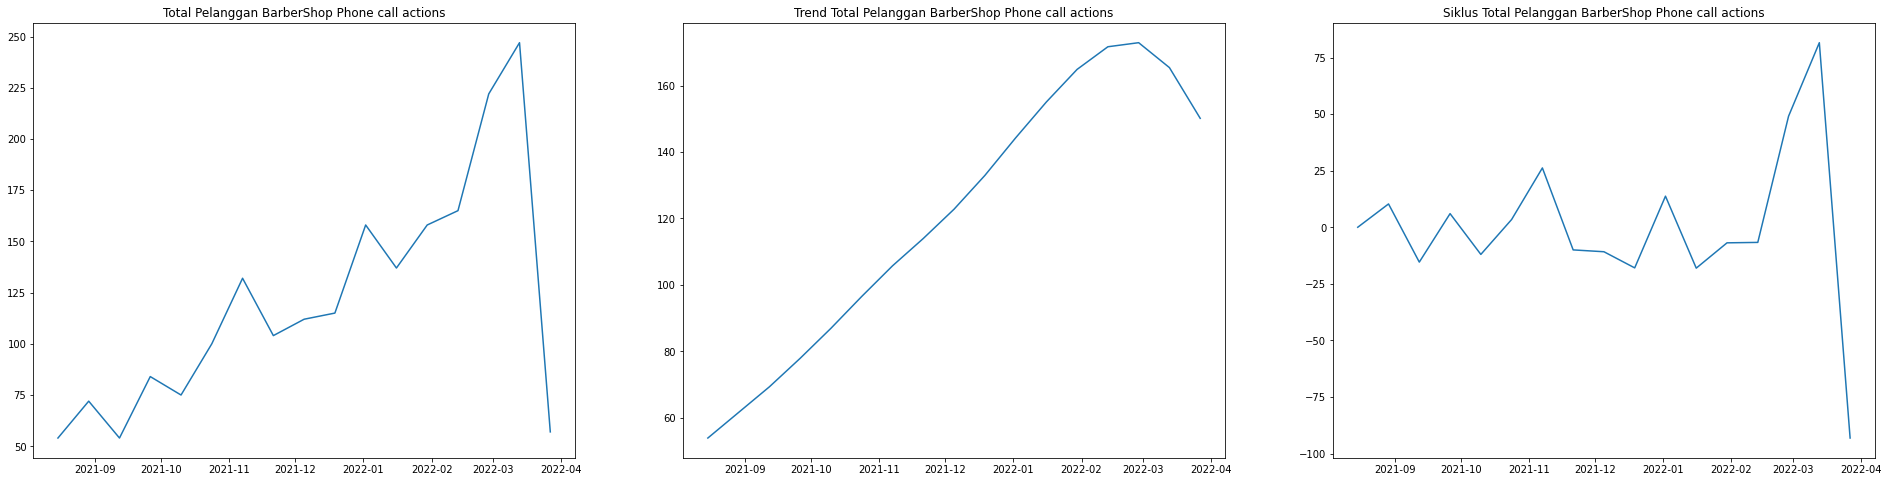

In [121]:
cycle, trend = sm.tsa.filters.hpfilter(df, 12)
fig, ax = plt.subplots(1,3,figsize=(33,8))
ax[0].plot(df)
ax[0].set_title('Total Pelanggan BarberShop {}'.format(i))
ax[1].plot(trend)
ax[1].set_title('Trend Total Pelanggan BarberShop {}'.format(i))
ax[2].plot(cycle)
ax[2].set_title('Siklus Total Pelanggan BarberShop {}'.format(i))
plt.show()

Kesimpulan = **terlihat data memiliki trend, pola musiman**

`Train Test Split`

data train = 70%

data test = 30%

In [122]:
train_data, test_data = df[0 : int(len(df) * 0.7)], df[int(len(df) * 0.7) :]

In [123]:
print('bentuk data train = ',train_data.shape)
print('bentuk data test = ',test_data.shape)

bentuk data train =  (11, 1)
bentuk data test =  (6, 1)


#Model Eksponensial Smoothing

`asumsi : `

Pola Musiman - Ya

Pola Trend - Ya

In [124]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

`menggunakan fungsi holtwinters`

In [125]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

seasonal = [2,3,4]
MAPE_add = []
MAPE_mul = []

for i in seasonal:
  hwmodel_add = ExponentialSmoothing(train_data['total_pelanggan'],trend='add', seasonal='add', seasonal_periods=i).fit()
  hwmodel_mul = ExponentialSmoothing(train_data['total_pelanggan'],trend='mul', seasonal='mul', seasonal_periods=i).fit()
  test_pred_add= hwmodel_add.forecast(test_data.shape[0])
  test_pred_mul= hwmodel_mul.forecast(test_data.shape[0])
  MAPE_add.append(mape(test_data['total_pelanggan'], test_pred_add))
  MAPE_mul.append(mape(test_data['total_pelanggan'], test_pred_mul))

ETS = pd.DataFrame(list(zip(seasonal, MAPE_add, MAPE_mul)),columns =['Periode Musiman', 'MAPE Additive', 'MAPE Multiplicative'])
ETS

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.p

,Periode Musiman,MAPE Additive,MAPE Multiplicative
0,2,47.597180,58.322658
1,3,50.390252,70.073875
2,4,46.077351,55.107634


Insight ;
*   Parameter `trend additive dan periode musiman (4)` memiliki tingkat error lebih kecil

In [126]:
#HoltWinter dengan parameter alpha,beta,gamma tanpa pola musiman
seasonal = []
a = []
b = []
c = []
MAPE_add = []
MAPE_mul = []

for i in [2,3,4,5,6,12]:
  for alpha in np.arange(0.1, 1, 0.1):
    for beta in np.arange(0.1, 1, 0.1):
      for gamma in np.arange(0.1, 1, 0.1):
        seasonal.append(i)
        a.append(alpha)
        b.append(beta)
        c.append(gamma)
        hwmodel_add = ExponentialSmoothing(train_data['total_pelanggan'],trend='add', seasonal_periods=i).fit(smoothing_level=alpha, smoothing_slope=beta, damping_slope =gamma, optimized=False)
        hwmodel_mul = ExponentialSmoothing(train_data['total_pelanggan'],trend='mul', seasonal_periods=i).fit(smoothing_level=alpha, smoothing_slope=beta, damping_slope =gamma, optimized=False)
        test_pred_add= hwmodel_add.forecast(test_data.shape[0])
        test_pred_mul= hwmodel_mul.forecast(test_data.shape[0])
        MAPE_add.append(mape(test_data['total_pelanggan'], test_pred_add))
        MAPE_mul.append(mape(test_data['total_pelanggan'], test_pred_mul))

ETS_param = pd.DataFrame(list(zip(seasonal, a, b, c, MAPE_add, MAPE_mul)),columns =['Periode Musiman', 'alpha', 'beta', 'Gamma', 'MAPE Additive', 'MAPE Multiplicative'])

Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred freque

In [127]:
#urutan terkecil MAPE additive
ETS_param.sort_values(by=['MAPE Additive'], ascending=True).head()

,Periode Musiman,alpha,beta,Gamma,MAPE Additive,MAPE Multiplicative
2987,6,0.1,0.8,0.9,44.641797,42.664939
2981,6,0.1,0.8,0.3,44.641797,42.664939
3708,12,0.1,0.8,0.1,44.641797,42.664939
3709,12,0.1,0.8,0.2,44.641797,42.664939
3710,12,0.1,0.8,0.3,44.641797,42.664939


In [128]:
#urutan terkecil MAPE multiplicative
ETS_param.sort_values(by=['MAPE Multiplicative'], ascending=True).head()

,Periode Musiman,alpha,beta,Gamma,MAPE Additive,MAPE Multiplicative
2988,6,0.1,0.9,0.1,45.439,40.371601
78,2,0.1,0.9,0.7,45.439,40.371601
1533,4,0.1,0.9,0.4,45.439,40.371601
1534,4,0.1,0.9,0.5,45.439,40.371601
1535,4,0.1,0.9,0.6,45.439,40.371601


Insight ;
*   Parameter `alpha(0.1) & beta(0.9) & gamma(0.1), periode musiman(6) dan trend multiplicative` memiliki tingkat error lebih kecil


`plot model optimal`

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'Kurva Prediksi Visitor datang total_pelanggan | MAPE = 46.077351')

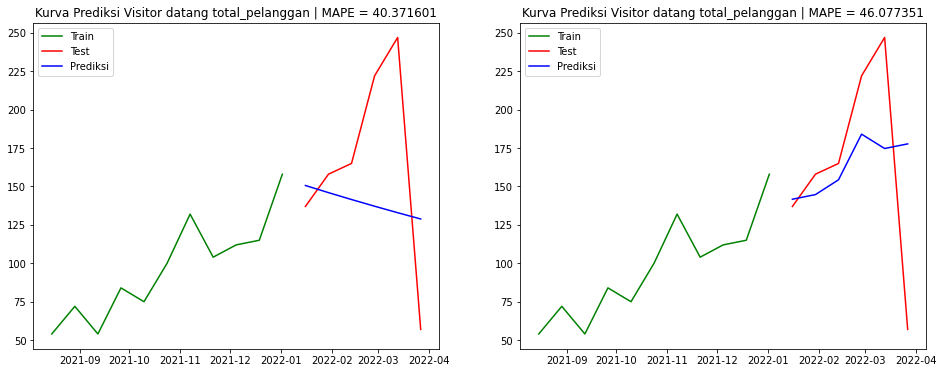

In [129]:
model1 = ExponentialSmoothing(train_data['total_pelanggan'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.9, damping_slope =0.1, optimized=False)
test_pred1 = model1.forecast(test_data.shape[0])

model2 = ExponentialSmoothing(train_data['total_pelanggan'],trend='add', seasonal='add', seasonal_periods=4).fit()
test_pred2 = model2.forecast(test_data.shape[0])

plt.figure(figsize=(16,6))

ax = plt.subplot(121)
plt.plot(train_data.index, train_data['total_pelanggan'], color='g', label='Train')
plt.plot(test_data.index, test_data['total_pelanggan'], color='r', label='Test')
plt.plot(test_data.index, test_pred1, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Visitor datang {} | MAPE = 40.371601".format('total_pelanggan'))

ax = plt.subplot(122)
plt.plot(train_data.index, train_data['total_pelanggan'], color='g', label='Train')
plt.plot(test_data.index, test_data['total_pelanggan'], color='r', label='Test')
plt.plot(test_data.index, test_pred2, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Visitor datang {} | MAPE = 46.077351".format('total_pelanggan'))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'Kurva Peramalan Visitor datang total_pelanggan | MAPE = 46.077351')

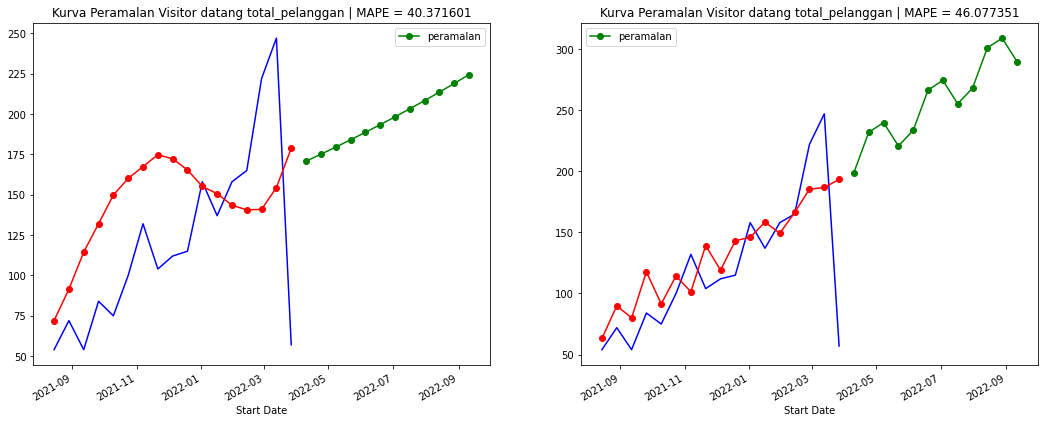

In [130]:
model1 = ExponentialSmoothing(df['total_pelanggan'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.9, damping_slope =0.1, optimized=False)
test_pred1 = model1.forecast(12).rename('peramalan')

model2 = ExponentialSmoothing(df['total_pelanggan'],trend='add', seasonal='add', seasonal_periods=4).fit()
test_pred2 = model2.forecast(12).rename('peramalan')

plt.figure(figsize=(18,7))

ax = plt.subplot(121)
plt.plot(df.index, df['total_pelanggan'], color='blue', label='Data')
model1.fittedvalues.plot(marker="o", color='red')
test_pred1.plot(color='green', marker="o", legend=True)
plt.title("Kurva Peramalan Visitor datang {} | MAPE = 40.371601".format('total_pelanggan'))

ax = plt.subplot(122)
plt.plot(df.index, df['total_pelanggan'], color='blue', label='Data')
model2.fittedvalues.plot(marker="o", color='red')
test_pred2.plot(color='green', marker="o", legend=True)
plt.title("Kurva Peramalan Visitor datang {} | MAPE = 46.077351".format('total_pelanggan'))

#Kesimpulan
model terbaik = MAPE terkecil = 40.371601

model terbaik = Holtwinter parameter `alpha(0.1) & beta(0.8) & gamma(0.8), periode musiman(6) dan trend multiplicative` 

In [ ]:
model = ExponentialSmoothing(df['total_pelanggan'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.9, damping_slope =0.1, optimized=False)
forecast = model.forecast(12)
forecast.plot(kind='line', figsize=(13, 8))

In [89]:
print(forecast)

2022-04-10    170.788837
2022-04-24    175.084439
2022-05-08    179.488082
2022-05-22    184.002483
2022-06-05    188.630429
2022-06-19    193.374774
2022-07-03    198.238447
2022-07-17    203.224449
2022-07-31    208.335857
2022-08-14    213.575824
2022-08-28    218.947585
2022-09-11    224.454453
Freq: 2W-SUN, dtype: float64


Hasil : Di waktu yang mendatang akan terjadi peningkatan sighnifikan terhadap jumlah visitor google bisnis yang datang ke BarberShop